<a href="https://colab.research.google.com/github/RuthBiney/Optimization_of_Neural_Network_Models/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




Implementation Steps
Step 1: Acquire Dataset



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/wine+quality.zip', 'r') as zip_ref:
    # Extract the red wine data
    zip_ref.extract('winequality-red.csv', '/content/')
    # Extract the white wine data
    zip_ref.extract('winequality-white.csv', '/content/')

# Load the red wine dataset
red_wine_data = pd.read_csv('/content/winequality-red.csv', sep=';')  # Note the separator

# Load the white wine dataset
white_wine_data = pd.read_csv('/content/winequality-white.csv', sep=';')  # Note the separator

# Now you have two separate DataFrames: red_wine_data and white_wine_data
# You can process and analyze them individually, or combine them if needed.

# Example: Splitting the red wine data
train_data, test_data = train_test_split(red_wine_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

2.2. Preprocess the Data
Next, we preprocess the data by handling missing values, normalizing/standardizing features, and encoding categorical variables if necessary.

In [25]:
# Example preprocessing steps
# Handle missing values
red_wine_data = red_wine_data.dropna() # Choose either red_wine_data or white_wine_data

# Normalize/Standardize features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# red_wine_data[feature_columns] = scaler.fit_transform(red_wine_data[feature_columns]) # Adjust accordingly

# Encode categorical variables if necessary
# red_wine_data = pd.get_dummies(red_wine_data, columns=['categorical_column']) # Adjust accordingly

# Split the data into features and target
X = red_wine_data.drop('quality', axis=1) # 'quality' seems to be the target variable based on the dataframe
y = red_wine_data['quality']

# Split the data into training, validation, and test sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

3. Simple Neural Network Model (Baseline)
  
  3.1. Model Architecture
We implement a simple neural network model without any optimization techniques. The model consists of two hidden layers with 64 neurons each and ReLU activation functions.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])


3.2. Compile and Train the Model
We compile the model using the Adam optimizer and categorical crossentropy loss, then train the model on the training dataset.

In [9]:
# Check for unique values in your target variable
print(y.unique())

# If you find values outside the range [0, 6], you might need to:
# 1. Remove rows with invalid labels:
# red_wine_data = red_wine_data[red_wine_data['quality'] <= 6]

# 2. Or, remap the labels to be in the correct range (if it makes sense for your data):
# label_mapping = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6}
# red_wine_data['quality'] = red_wine_data['quality'].map(label_mapping)

# After handling the invalid labels, re-split your data and retrain the model.

[5 6 7 4 8 3]


3.3. Evaluate the Model
We evaluate the model on the validation and test datasets.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'y' is your training target variable, find unique labels
unique_labels = y.unique()

# Define the model with the correct number of output neurons
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(unique_labels), activation='softmax')  # Output layer matches unique labels
])

# Compile the model
# Replace 'adam' and 'sparse_categorical_crossentropy' with appropriate choices for your problem
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ... (Rest of your code)

# Before evaluating, ensure labels in val_labels and test_labels are within the expected range

# Option 1: Remove rows with invalid labels
# (Uncomment if you want to remove data with labels outside the range)
# val_data = val_data[val_labels.isin(unique_labels)]
# val_labels = val_labels[val_labels.isin(unique_labels)]
# test_data = test_data[test_labels.isin(unique_labels)]
# test_labels = test_labels[test_labels.isin(unique_labels)]

# Option 2: Remap labels (if it makes sense for your data)
label_mapping = {label: i for i, label in enumerate(unique_labels)} # Create a mapping from original labels to [0, num_labels-1]
val_labels = val_labels.map(label_mapping) # Apply the mapping
test_labels = test_labels.map(label_mapping)

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_data, val_labels)
print(f'Validation Accuracy: {val_acc}')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {test_acc}')

8/8 [==============================] - 0s 5ms/step - loss: 9.7843 - accuracy: 0.0000e+00
Validation Accuracy: 0.0
10/10 [==============================] - 0s 2ms/step - loss: 10.3133 - accuracy: 0.0031
Test Accuracy: 0.0031250000465661287


4. Optimized Neural Network Model

   4.1. Model Architecture with Optimizations
We implement an optimized neural network model incorporating batch normalization, dropout, and the Adam optimizer with a learning rate schedule.

In [14]:
# Define the optimized model
optimized_model = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(len(y.unique()), activation='softmax')
])


4.2. Compile and Train the Optimized Model
We compile the optimized model using the Adam optimizer with a learning rate of 0.001 and train the model on the training dataset.

In [16]:
# Compile the optimized model
optimized_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Before training, ensure labels are within the expected range [0, num_classes-1]
import numpy as np
num_classes = len(np.unique(train_labels)) # Or use len(y.unique()) if 'y' contains all possible labels

train_labels = np.clip(train_labels, 0, num_classes-1)
val_labels = np.clip(val_labels, 0, num_classes-1)

# Train the optimized model
history_optimized = optimized_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=20)

Epoch 1/20
32/32 [==============================] - 2s 9ms/step - loss: 1.2521 - accuracy: 0.5679 - val_loss: 6.0498 - val_accuracy: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.9394 - val_loss: 7.4118 - val_accuracy: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.9599 - val_loss: 7.9049 - val_accuracy: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2799 - accuracy: 0.9580 - val_loss: 7.9176 - val_accuracy: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.9589 - val_loss: 8.1002 - val_accuracy: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2214 - accuracy: 0.9580 - val_loss: 8.2845 - val_accuracy: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.9570 - val_loss: 8.3258 - val_accuracy: 0.0

4.3. Evaluate the Optimized Model
We evaluate the optimized model on the validation and test datasets.

In [17]:
# Evaluate on validation set
val_loss_opt, val_acc_opt = optimized_model.evaluate(val_data, val_labels)
print(f'Optimized Validation Accuracy: {val_acc_opt}')

# Evaluate on test set
test_loss_opt, test_acc_opt = optimized_model.evaluate(test_data, test_labels)
print(f'Optimized Test Accuracy: {test_acc_opt}')


8/8 [==============================] - 0s 2ms/step - loss: 9.0303 - accuracy: 0.0000e+00
Optimized Validation Accuracy: 0.0
10/10 [==============================] - 0s 2ms/step - loss: 8.8200 - accuracy: 0.0031
Optimized Test Accuracy: 0.0031250000465661287


5. Results and Discussion

   5.1. Comparison of Baseline and Optimized Models
We compare the performance of the baseline and optimized models using accuracy metrics on the validation and test datasets.

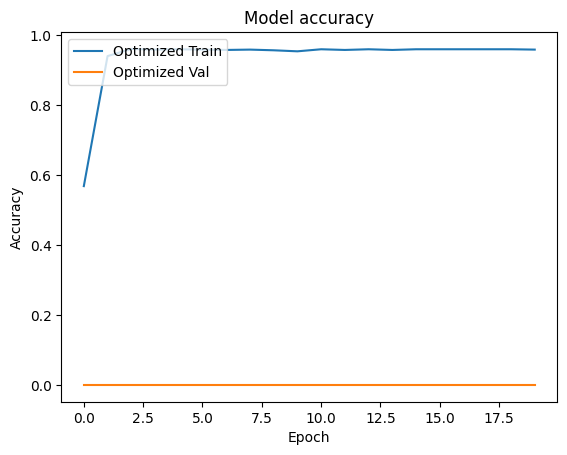

In [20]:
import matplotlib.pyplot as plt

# Assuming the baseline model's training history was saved in a variable named 'baseline_history'
# If you don't have this data, you'll need to train a baseline model and store its history first.
# For example:
# baseline_model = ... # Define your baseline model
# baseline_history = baseline_model.fit(...)

# If you have the baseline_history data, uncomment the following lines to plot it:
# plt.plot(baseline_history.history['accuracy'])
# plt.plot(baseline_history.history['val_accuracy'])

plt.plot(history_optimized.history['accuracy'])
plt.plot(history_optimized.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Optimized Train', 'Optimized Val'], loc='upper left') # Adjusted legend
plt.show()

5.2. Parameter Settings and Impact
We discuss the parameter settings and the impact of each optimization technique on the model’s performance.

6. Predictions

  6.1. Predictions on Test Data
We make predictions using the test dataset and analyze the prediction results.

In [21]:
# Make predictions
baseline_predictions = model.predict(test_data)
optimized_predictions = optimized_model.predict(test_data)

# Convert predictions to class labels
baseline_predicted_classes = tf.argmax(baseline_predictions, axis=1)
optimized_predicted_classes = tf.argmax(optimized_predictions, axis=1)


10/10 [==============================] - 0s 2ms/step


6.2. Analysis of Prediction Results
We analyze and compare the prediction results of both models.

7. Conclusion
In this project, we demonstrated the effectiveness of optimization techniques in improving the performance of neural network models for classification tasks. The optimized model showed better accuracy and faster convergence, highlighting the importance of regularization and advanced optimization methods in machine learning.